**ニューラルネットワーク**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import pandas as pd
from pandas import DataFrame
import numpy as np

import keras
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from keras.layers.core import Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from keras.callbacks import EarlyStopping, LearningRateScheduler
from sklearn.metrics import r2_score

from keras.layers import LeakyReLU

**train**

In [4]:
angry = pd.read_csv("/content/drive/MyDrive/kaggle/mediapipe/train/angry.csv",index_col=0)
angry['response']=0

disgust = pd.read_csv("/content/drive/MyDrive/kaggle/mediapipe/train/disgust.csv",index_col=0)
disgust['response']=1

fear = pd.read_csv("/content/drive/MyDrive/kaggle/mediapipe/train/fear.csv",index_col=0)
fear['response']=2

happy = pd.read_csv("/content/drive/MyDrive/kaggle/mediapipe/train/happy.csv",index_col=0)
happy['response']=3

neutral = pd.read_csv("/content/drive/MyDrive/kaggle/mediapipe/train/neutral.csv",index_col=0)
neutral['response']=4

sad = pd.read_csv("/content/drive/MyDrive/kaggle/mediapipe/train/sad.csv",index_col=0)
sad['response']=5

surprise = pd.read_csv("/content/drive/MyDrive/kaggle/mediapipe/train/surprise.csv",index_col=0)
surprise['response']=6

df_train=pd.concat([angry,disgust,fear,happy,neutral,sad,surprise])
df_train

,0_x,0_y,0_z,1_x,1_y,1_z,2_x,2_y,2_z,3_x,3_y,3_z,4_x,4_y,4_z,5_x,5_y,5_z,6_x,6_y,6_z,7_x,7_y,7_z,8_x,8_y,8_z,9_x,9_y,9_z,10_x,10_y,10_z,11_x,11_y,11_z,12_x,12_y,12_z,13_x,...,455_x,455_y,455_z,456_x,456_y,456_z,457_x,457_y,457_z,458_x,458_y,458_z,459_x,459_y,459_z,460_x,460_y,460_z,461_x,461_y,461_z,462_x,462_y,462_z,463_x,463_y,463_z,464_x,464_y,464_z,465_x,465_y,465_z,466_x,466_y,466_z,467_x,467_y,467_z,response
0,0.470799,0.682127,-0.080930,0.451555,0.577134,-0.148783,0.462453,0.606991,-0.080743,0.419781,0.475499,-0.106345,0.446804,0.544970,-0.157623,0.444218,0.502637,-0.145318,0.441261,0.398702,-0.066967,0.248629,0.423939,0.063238,0.434136,0.314108,-0.042840,0.428503,0.269363,-0.045183,0.412151,0.113719,-0.008327,0.472860,0.696754,-0.077271,0.475543,0.708377,-0.068313,0.478086,...,0.549226,0.570265,-0.075076,0.498631,0.479153,-0.095533,0.500578,0.565022,-0.136893,0.488898,0.582532,-0.124698,0.503528,0.569535,-0.124026,0.543569,0.581040,-0.065052,0.482020,0.586439,-0.131688,0.482431,0.592741,-0.099276,0.528567,0.376751,0.015289,0.511579,0.387416,0.000257,0.500816,0.394400,-0.018073,0.670845,0.350680,0.017553,0.687646,0.328475,0.017699,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,0.469567,0.799870,-0.017644,0.481175,0.715553,-0.163720,0.475471,0.722137,-0.058313,0.460369,0.569251,-0.168889,0.485544,0.682423,-0.187439,0.489262,0.624326,-0.192670,0.498022,0.459769,-0.162172,0.246628,0.379609,-0.040119,0.508284,0.366295,-0.177562,0.513777,0.319253,-0.206077,0.529422,0.090397,-0.250223,0.467822,0.813734,-0.005615,0.466160,0.819878,0.009673,0.464878,...,0.587097,0.681386,-0.057365,0.548727,0.580005,-0.135216,0.540471,0.702664,-0.146422,0.519508,0.712540,-0.125673,0.540117,0.701065,-0.128251,0.576638,0.688781,-0.041337,0.511504,0.719847,-0.133165,0.507532,0.717340,-0.088307,0.586357,0.406977,-0.051842,0.566435,0.423663,-0.069418,0.556977,0.440481,-0.091104,0.759930,0.388642,-0.036110,0.780347,0.375347,-0.038214,0
4,0.711111,0.717369,-0.049849,0.690491,0.627410,-0.166673,0.685717,0.647518,-0.075281,0.614888,0.525529,-0.153899,0.681057,0.596982,-0.183747,0.661234,0.551952,-0.180692,0.604394,0.432367,-0.128494,0.356486,0.483591,-0.033750,0.578697,0.367118,-0.129393,0.565757,0.328598,-0.146556,0.488445,0.137941,-0.152786,0.715874,0.731684,-0.041941,0.717353,0.741450,-0.030431,0.715555,...,0.767439,0.575113,-0.060351,0.692967,0.504457,-0.115708,0.734060,0.597645,-0.144577,0.719861,0.617243,-0.130224,0.732876,0.599488,-0.127973,0.761956,0.586740,-0.048261,0.716382,0.624754,-0.138608,0.712132,0.628135,-0.098415,0.653148,0.374463,-0.011017,0.644364,0.392871,-0.031899,0.643681,0.406177,-0.056420,0.781706,0.305024,0.019875,0.794722,0.287267,0.020835,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8108,0.436367,0.787778,-0.124726,0.421533,0.635966,-0.201269,0.445769,0.683730,-0.111298,0.419493,0.508523,-0.133703,0.421712,0.595219,-0.212302,0.434398,0.545735,-0.193698,0.479222,0.423726,-0.082440,0.253619,0.398206,0.138009,0.503545,0.298082,-0.048313,0.507884,0.236569,-0.051585,0.532120,0.060675,0.000498,0.436226,0.808869,-0.120592,0.439222,0.828870,-0.107388,0.444456,...

In [5]:
# 欠損値の行の削除
df_train = df_train.dropna()
df_train

,0_x,0_y,0_z,1_x,1_y,1_z,2_x,2_y,2_z,3_x,3_y,3_z,4_x,4_y,4_z,5_x,5_y,5_z,6_x,6_y,6_z,7_x,7_y,7_z,8_x,8_y,8_z,9_x,9_y,9_z,10_x,10_y,10_z,11_x,11_y,11_z,12_x,12_y,12_z,13_x,...,455_x,455_y,455_z,456_x,456_y,456_z,457_x,457_y,457_z,458_x,458_y,458_z,459_x,459_y,459_z,460_x,460_y,460_z,461_x,461_y,461_z,462_x,462_y,462_z,463_x,463_y,463_z,464_x,464_y,464_z,465_x,465_y,465_z,466_x,466_y,466_z,467_x,467_y,467_z,response
0,0.470799,0.682127,-0.080930,0.451555,0.577134,-0.148783,0.462453,0.606991,-0.080743,0.419781,0.475499,-0.106345,0.446804,0.544970,-0.157623,0.444218,0.502637,-0.145318,0.441261,0.398702,-0.066967,0.248629,0.423939,0.063238,0.434136,0.314108,-0.042840,0.428503,0.269363,-0.045183,0.412151,0.113719,-0.008327,0.472860,0.696754,-0.077271,0.475543,0.708377,-0.068313,0.478086,...,0.549226,0.570265,-0.075076,0.498631,0.479153,-0.095533,0.500578,0.565022,-0.136893,0.488898,0.582532,-0.124698,0.503528,0.569535,-0.124026,0.543569,0.581040,-0.065052,0.482020,0.586439,-0.131688,0.482431,0.592741,-0.099276,0.528567,0.376751,0.015289,0.511579,0.387416,0.000257,0.500816,0.394400,-0.018073,0.670845,0.350680,0.017553,0.687646,0.328475,0.017699,0
3,0.469567,0.799870,-0.017644,0.481175,0.715553,-0.163720,0.475471,0.722137,-0.058313,0.460369,0.569251,-0.168889,0.485544,0.682423,-0.187439,0.489262,0.624326,-0.192670,0.498022,0.459769,-0.162172,0.246628,0.379609,-0.040119,0.508284,0.366295,-0.177562,0.513777,0.319253,-0.206077,0.529422,0.090397,-0.250223,0.467822,0.813734,-0.005615,0.466160,0.819878,0.009673,0.464878,...,0.587097,0.681386,-0.057365,0.548727,0.580005,-0.135216,0.540471,0.702664,-0.146422,0.519508,0.712540,-0.125673,0.540117,0.701065,-0.128251,0.576638,0.688781,-0.041337,0.511504,0.719847,-0.133165,0.507532,0.717340,-0.088307,0.586357,0.406977,-0.051842,0.566435,0.423663,-0.069418,0.556977,0.440481,-0.091104,0.759930,0.388642,-0.036110,0.780347,0.375347,-0.038214,0
4,0.711111,0.717369,-0.049849,0.690491,0.627410,-0.166673,0.685717,0.647518,-0.075281,0.614888,0.525529,-0.153899,0.681057,0.596982,-0.183747,0.661234,0.551952,-0.180692,0.604394,0.432367,-0.128494,0.356486,0.483591,-0.033750,0.578697,0.367118,-0.129393,0.565757,0.328598,-0.146556,0.488445,0.137941,-0.152786,0.715874,0.731684,-0.041941,0.717353,0.741450,-0.030431,0.715555,...,0.767439,0.575113,-0.060351,0.692967,0.504457,-0.115708,0.734060,0.597645,-0.144577,0.719861,0.617243,-0.130224,0.732876,0.599488,-0.127973,0.761956,0.586740,-0.048261,0.716382,0.624754,-0.138608,0.712132,0.628135,-0.098415,0.653148,0.374463,-0.011017,0.644364,0.392871,-0.031899,0.643681,0.406177,-0.056420,0.781706,0.305024,0.019875,0.794722,0.287267,0.020835,0
5,0.483527,0.809326,-0.011760,0.471344,0.743471,-0.142790,0.477575,0.747904,-0.048826,0.440667,0.626995,-0.150865,0.469298,0.717277,-0.165346,0.468237,0.670506,-0.171879,0.467720,0.537037,-0.150893,0.240163,0.469291,-0.029700,0.465131,0.452157,-0.168719,0.464442,0.411362,-0.195280,0.464029,0.211647,-0.244948,0.484648,0.821535,-0.000828,0.485566,0.829372,0.013383,0.486276,...,0.577652,0.712560,-0.054610,0.526567,0.633014,-0.126396,0.525855,0.731817,-0.131335,0.510710,0.741160,-0.110961,0.528229,0.730700,-0.114970,0.570109,0.719490,-0.039654,0.503137,0.746706,-0.117052,0.502184,0.745102,-0.077414,0.561107,0.491635,-0.061222,0.542474,0.504941,-0.075310,0.531677,0.519053,-0.091882,0.714959,0.478284,-0.055081,0.734137,0.454954,-0.056444,0
6,0.061688,0.692855,-0.050553,0.007891,0.590705,-0.105411,0.077929,0.630701,-0.051491,0.046199,0.485684,-0.054675,0.005127,0.558763,-0.112451,0.028653,0.518483,-0.106369,0.111388,0.412971,-0.060235,0.073318,0.375920,0.218558,0.131059,0.346348,-0.051665,0.126254,0.306380,-0.058228,0.163256,0.115645,-0.043075,0.064920,0.709892,-0.048006,0.074227,0.725477,-0.040172,0.088102,...,0.163942,0.617571,-0.105464,0.118378,0.504879,-0.112223,0.064099,0.592840,-0.129636,0.066158,0.608494,-0.105348,0.077572,0.599428,-0.120047,0.163820,0.627514,-0.088191,0.054225,0.609798,-0.107000,0.072554,0.619090,-0.079689,0.260811,

**validation**

In [6]:
angry = pd.read_csv("/content/drive/MyDrive/kaggle/mediapipe/valid/angry.csv",index_col=0)
angry['response']=0

disgust = pd.read_csv("/content/drive/MyDrive/kaggle/mediapipe/valid/disgust.csv",index_col=0)
disgust['response']=1

fear = pd.read_csv("/content/drive/MyDrive/kaggle/mediapipe/valid/fear.csv",index_col=0)
fear['response']=2

happy = pd.read_csv("/content/drive/MyDrive/kaggle/mediapipe/valid/happy.csv",index_col=0)
happy['response']=3

neutral = pd.read_csv("/content/drive/MyDrive/kaggle/mediapipe/valid/neutral.csv",index_col=0)
neutral['response']=4

sad = pd.read_csv("/content/drive/MyDrive/kaggle/mediapipe/valid/sad.csv",index_col=0)
sad['response']=5

surprise = pd.read_csv("/content/drive/MyDrive/kaggle/mediapipe/valid/surprise.csv",index_col=0)
surprise['response']=6

df_valid=pd.concat([angry,disgust,fear,happy,neutral,sad,surprise])
df_valid

,0_x,0_y,0_z,1_x,1_y,1_z,2_x,2_y,2_z,3_x,3_y,3_z,4_x,4_y,4_z,5_x,5_y,5_z,6_x,6_y,6_z,7_x,7_y,7_z,8_x,8_y,8_z,9_x,9_y,9_z,10_x,10_y,10_z,11_x,11_y,11_z,12_x,12_y,12_z,13_x,...,455_x,455_y,455_z,456_x,456_y,456_z,457_x,457_y,457_z,458_x,458_y,458_z,459_x,459_y,459_z,460_x,460_y,460_z,461_x,461_y,461_z,462_x,462_y,462_z,463_x,463_y,463_z,464_x,464_y,464_z,465_x,465_y,465_z,466_x,466_y,466_z,467_x,467_y,467_z,response
0,0.646184,0.771045,-0.064509,0.699773,0.674395,-0.154976,0.651597,0.694304,-0.074662,0.646986,0.570064,-0.147134,0.705292,0.645240,-0.168001,0.693458,0.602760,-0.162187,0.646566,0.493141,-0.108186,0.354816,0.467029,-0.101469,0.630754,0.437828,-0.104779,0.633086,0.403363,-0.117815,0.618115,0.221551,-0.109952,0.642543,0.786173,-0.059554,0.634837,0.797371,-0.049019,0.625717,...,0.722309,0.665204,-0.031236,0.705509,0.576893,-0.082526,0.730094,0.663028,-0.118402,0.704814,0.677396,-0.114158,0.720673,0.665639,-0.103712,0.709672,0.675192,-0.025385,0.704672,0.681855,-0.123482,0.689454,0.685429,-0.089247,0.658188,0.464244,0.032473,0.652807,0.476566,0.003566,0.657821,0.486502,-0.023710,0.760315,0.449161,0.117657,0.774267,0.438793,0.123939,0
1,0.505669,0.783729,-0.018900,0.494926,0.704555,-0.138054,0.502628,0.715004,-0.048425,0.468633,0.583715,-0.139265,0.492915,0.674538,-0.158913,0.492583,0.625474,-0.163408,0.493490,0.490889,-0.140465,0.290138,0.437990,-0.005445,0.490290,0.410842,-0.158440,0.487358,0.367928,-0.183734,0.480591,0.143603,-0.224993,0.506490,0.797592,-0.010296,0.508471,0.806654,0.002232,0.510466,...,0.591057,0.674407,-0.060632,0.546893,0.587383,-0.123923,0.543864,0.690438,-0.130324,0.530943,0.702177,-0.110037,0.546126,0.690475,-0.115120,0.585029,0.682811,-0.044681,0.524011,0.708340,-0.115868,0.523654,0.708052,-0.077594,0.578969,0.438334,-0.062839,0.562731,0.454919,-0.074458,0.553192,0.470096,-0.090233,0.725927,0.408339,-0.069225,0.744019,0.390133,-0.072826,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,0.570398,0.522947,-0.131259,0.590544,0.407057,-0.243462,0.575076,0.442734,-0.139920,0.545563,0.245522,-0.183282,0.592644,0.358521,-0.254860,0.588737,0.293304,-0.235133,0.573314,0.134256,-0.114054,0.247955,0.111247,0.020786,0.569965,0.023101,-0.076176,0.571534,-0.036601,-0.077871,0.571085,-0.254265,-0.023915,0.568864,0.543026,-0.126968,0.565578,0.557227,-0.117273,0.562388,...,0.701285,0.398109,-0.112665,0.645092,0.262546,-0.144137,0.653856,0.397665,-0.213821,0.629371,0.420079,-0.201042,0.651777,0.404181,-0.194109,0.691392,0.409906,-0.100133,0.622482,0.425672,-0.213146,0.615524,0.431653,-0.164733,0.660485,0.112584,0.037911,0.641393,0.126396,0.008322,0.632815,0.136202,-0.025226,0.845161,0.090934,0.079624,0.868495,0.070053,0.083202,0
4,0.550640,0.693204,-0.039426,0.548861,0.598235,-0.208260,0.550324,0.613049,-0.084360,0.509632,0.448456,-0.202934,0.548431,0.560020,-0.234673,0.547445,0.498828,-0.237312,0.546108,0.338340,-0.185625,0.253514,0.294872,-0.029661,0.545075,0.237159,-0.195135,0.544766,0.188114,-0.223748,0.543859,-0.005355,-0.265706,0.550370,0.708401,-0.027205,0.550817,0.716306,-0.010439,0.550574,...,0.679590,0.559859,-0.085416,0.618623,0.454157,-0.168314,0.619636,0.580236,-0.189447,0.597484,0.595406,-0.164539,0.620160,0.580757,-0.167690,0.669677,0.569212,-0.066446,0.588520,0.602988,-0.174002,0.585882,0.603442,-0.120591,0.649253,0.284169,-0.059663,0.628641,0.302691,-0.079724,0.617884,0.319325,-0.104449,0.845816,0.261384,-0.046163,0.866641,0.243358,-0.047362,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [7]:
# 欠損値の行の削除
df_valid = df_valid.dropna()
df_valid

,0_x,0_y,0_z,1_x,1_y,1_z,2_x,2_y,2_z,3_x,3_y,3_z,4_x,4_y,4_z,5_x,5_y,5_z,6_x,6_y,6_z,7_x,7_y,7_z,8_x,8_y,8_z,9_x,9_y,9_z,10_x,10_y,10_z,11_x,11_y,11_z,12_x,12_y,12_z,13_x,...,455_x,455_y,455_z,456_x,456_y,456_z,457_x,457_y,457_z,458_x,458_y,458_z,459_x,459_y,459_z,460_x,460_y,460_z,461_x,461_y,461_z,462_x,462_y,462_z,463_x,463_y,463_z,464_x,464_y,464_z,465_x,465_y,465_z,466_x,466_y,466_z,467_x,467_y,467_z,response
0,0.646184,0.771045,-0.064509,0.699773,0.674395,-0.154976,0.651597,0.694304,-0.074662,0.646986,0.570064,-0.147134,0.705292,0.645240,-0.168001,0.693458,0.602760,-0.162187,0.646566,0.493141,-0.108186,0.354816,0.467029,-0.101469,0.630754,0.437828,-0.104779,0.633086,0.403363,-0.117815,0.618115,0.221551,-0.109952,0.642543,0.786173,-0.059554,0.634837,0.797371,-0.049019,0.625717,...,0.722309,0.665204,-0.031236,0.705509,0.576893,-0.082526,0.730094,0.663028,-0.118402,0.704814,0.677396,-0.114158,0.720673,0.665639,-0.103712,0.709672,0.675192,-0.025385,0.704672,0.681855,-0.123482,0.689454,0.685429,-0.089247,0.658188,0.464244,0.032473,0.652807,0.476566,0.003566,0.657821,0.486502,-0.023710,0.760315,0.449161,0.117657,0.774267,0.438793,0.123939,0
1,0.505669,0.783729,-0.018900,0.494926,0.704555,-0.138054,0.502628,0.715004,-0.048425,0.468633,0.583715,-0.139265,0.492915,0.674538,-0.158913,0.492583,0.625474,-0.163408,0.493490,0.490889,-0.140465,0.290138,0.437990,-0.005445,0.490290,0.410842,-0.158440,0.487358,0.367928,-0.183734,0.480591,0.143603,-0.224993,0.506490,0.797592,-0.010296,0.508471,0.806654,0.002232,0.510466,...,0.591057,0.674407,-0.060632,0.546893,0.587383,-0.123923,0.543864,0.690438,-0.130324,0.530943,0.702177,-0.110037,0.546126,0.690475,-0.115120,0.585029,0.682811,-0.044681,0.524011,0.708340,-0.115868,0.523654,0.708052,-0.077594,0.578969,0.438334,-0.062839,0.562731,0.454919,-0.074458,0.553192,0.470096,-0.090233,0.725927,0.408339,-0.069225,0.744019,0.390133,-0.072826,0
3,0.570398,0.522947,-0.131259,0.590544,0.407057,-0.243462,0.575076,0.442734,-0.139920,0.545563,0.245522,-0.183282,0.592644,0.358521,-0.254860,0.588737,0.293304,-0.235133,0.573314,0.134256,-0.114054,0.247955,0.111247,0.020786,0.569965,0.023101,-0.076176,0.571534,-0.036601,-0.077871,0.571085,-0.254265,-0.023915,0.568864,0.543026,-0.126968,0.565578,0.557227,-0.117273,0.562388,...,0.701285,0.398109,-0.112665,0.645092,0.262546,-0.144137,0.653856,0.397665,-0.213821,0.629371,0.420079,-0.201042,0.651777,0.404181,-0.194109,0.691392,0.409906,-0.100133,0.622482,0.425672,-0.213146,0.615524,0.431653,-0.164733,0.660485,0.112584,0.037911,0.641393,0.126396,0.008322,0.632815,0.136202,-0.025226,0.845161,0.090934,0.079624,0.868495,0.070053,0.083202,0
4,0.550640,0.693204,-0.039426,0.548861,0.598235,-0.208260,0.550324,0.613049,-0.084360,0.509632,0.448456,-0.202934,0.548431,0.560020,-0.234673,0.547445,0.498828,-0.237312,0.546108,0.338340,-0.185625,0.253514,0.294872,-0.029661,0.545075,0.237159,-0.195135,0.544766,0.188114,-0.223748,0.543859,-0.005355,-0.265706,0.550370,0.708401,-0.027205,0.550817,0.716306,-0.010439,0.550574,...,0.679590,0.559859,-0.085416,0.618623,0.454157,-0.168314,0.619636,0.580236,-0.189447,0.597484,0.595406,-0.164539,0.620160,0.580757,-0.167690,0.669677,0.569212,-0.066446,0.588520,0.602988,-0.174002,0.585882,0.603442,-0.120591,0.649253,0.284169,-0.059663,0.628641,0.302691,-0.079724,0.617884,0.319325,-0.104449,0.845816,0.261384,-0.046163,0.866641,0.243358,-0.047362,0
5,0.524232,0.722622,-0.049771,0.507663,0.641512,-0.152562,0.513761,0.660620,-0.070796,0.469532,0.534461,-0.131731,0.503192,0.610827,-0.167332,0.497770,0.566464,-0.162588,0.485981,0.453394,-0.109463,0.277611,0.451074,0.012146,0.478230,0.386732,-0.106638,0.473144,0.346925,-0.121656,0.448775,0.154980,-0.122691,0.526606,0.735711,-0.043455,0.528293,0.743522,-0.033559,0.529045,...,0.599587,0.616237,-0.066650,0.545771,0.534554,-0.110159,0.554587,0.626398,-0.138413,0.541572,0.641357,-0.123250,0.556214,0.628658,-0.123357,0.593342,0.624776,-0.054591,0.535999,0.646648,-0.130326,0.534573,0.649607,-0.093859,0.56029

**---------------------------------------------------------------------**

In [8]:
x_train=DataFrame(df_train.drop('response',axis=1)) # 説明変数
y_train=DataFrame(df_train['response']) # 目的変数

x_valid=DataFrame(df_valid.drop('response',axis=1)) # 説明変数
y_valid=DataFrame(df_valid['response']) # 目的変数
x_train

,0_x,0_y,0_z,1_x,1_y,1_z,2_x,2_y,2_z,3_x,3_y,3_z,4_x,4_y,4_z,5_x,5_y,5_z,6_x,6_y,6_z,7_x,7_y,7_z,8_x,8_y,8_z,9_x,9_y,9_z,10_x,10_y,10_z,11_x,11_y,11_z,12_x,12_y,12_z,13_x,...,454_z,455_x,455_y,455_z,456_x,456_y,456_z,457_x,457_y,457_z,458_x,458_y,458_z,459_x,459_y,459_z,460_x,460_y,460_z,461_x,461_y,461_z,462_x,462_y,462_z,463_x,463_y,463_z,464_x,464_y,464_z,465_x,465_y,465_z,466_x,466_y,466_z,467_x,467_y,467_z
0,0.470799,0.682127,-0.080930,0.451555,0.577134,-0.148783,0.462453,0.606991,-0.080743,0.419781,0.475499,-0.106345,0.446804,0.544970,-0.157623,0.444218,0.502637,-0.145318,0.441261,0.398702,-0.066967,0.248629,0.423939,0.063238,0.434136,0.314108,-0.042840,0.428503,0.269363,-0.045183,0.412151,0.113719,-0.008327,0.472860,0.696754,-0.077271,0.475543,0.708377,-0.068313,0.478086,...,0.256575,0.549226,0.570265,-0.075076,0.498631,0.479153,-0.095533,0.500578,0.565022,-0.136893,0.488898,0.582532,-0.124698,0.503528,0.569535,-0.124026,0.543569,0.581040,-0.065052,0.482020,0.586439,-0.131688,0.482431,0.592741,-0.099276,0.528567,0.376751,0.015289,0.511579,0.387416,0.000257,0.500816,0.394400,-0.018073,0.670845,0.350680,0.017553,0.687646,0.328475,0.017699
3,0.469567,0.799870,-0.017644,0.481175,0.715553,-0.163720,0.475471,0.722137,-0.058313,0.460369,0.569251,-0.168889,0.485544,0.682423,-0.187439,0.489262,0.624326,-0.192670,0.498022,0.459769,-0.162172,0.246628,0.379609,-0.040119,0.508284,0.366295,-0.177562,0.513777,0.319253,-0.206077,0.529422,0.090397,-0.250223,0.467822,0.813734,-0.005615,0.466160,0.819878,0.009673,0.464878,...,0.315603,0.587097,0.681386,-0.057365,0.548727,0.580005,-0.135216,0.540471,0.702664,-0.146422,0.519508,0.712540,-0.125673,0.540117,0.701065,-0.128251,0.576638,0.688781,-0.041337,0.511504,0.719847,-0.133165,0.507532,0.717340,-0.088307,0.586357,0.406977,-0.051842,0.566435,0.423663,-0.069418,0.556977,0.440481,-0.091104,0.759930,0.388642,-0.036110,0.780347,0.375347,-0.038214
4,0.711111,0.717369,-0.049849,0.690491,0.627410,-0.166673,0.685717,0.647518,-0.075281,0.614888,0.525529,-0.153899,0.681057,0.596982,-0.183747,0.661234,0.551952,-0.180692,0.604394,0.432367,-0.128494,0.356486,0.483591,-0.033750,0.578697,0.367118,-0.129393,0.565757,0.328598,-0.146556,0.488445,0.137941,-0.152786,0.715874,0.731684,-0.041941,0.717353,0.741450,-0.030431,0.715555,...,0.345731,0.767439,0.575113,-0.060351,0.692967,0.504457,-0.115708,0.734060,0.597645,-0.144577,0.719861,0.617243,-0.130224,0.732876,0.599488,-0.127973,0.761956,0.586740,-0.048261,0.716382,0.624754,-0.138608,0.712132,0.628135,-0.098415,0.653148,0.374463,-0.011017,0.644364,0.392871,-0.031899,0.643681,0.406177,-0.056420,0.781706,0.305024,0.019875,0.794722,0.287267,0.020835
5,0.483527,0.809326,-0.011760,0.471344,0.743471,-0.142790,0.477575,0.747904,-0.048826,0.440667,0.626995,-0.150865,0.469298,0.717277,-0.165346,0.468237,0.670506,-0.171879,0.467720,0.537037,-0.150893,0.240163,0.469291,-0.029700,0.465131,0.452157,-0.168719,0.464442,0.411362,-0.195280,0.464029,0.211647,-0.244948,0.484648,0.821535,-0.000828,0.485566,0.829372,0.013383,0.486276,...,0.252982,0.577652,0.712560,-0.054610,0.526567,0.633014,-0.126396,0.525855,0.731817,-0.131335,0.510710,0.741160,-0.110961,0.528229,0.730700,-0.114970,0.570109,0.719490,-0.039654,0.503137,0.746706,-0.117052,0.502184,0.745102,-0.077414,0.561107,0.491635,-0.061222,0.542474,0.504941,-0.075310,0.531677,0.519053,-0.091882,0.714959,0.478284,-0.055081,0.734137,0.454954,-0.056444
6,0.061688,0.692855,-0.050553,0.007891,0.590705,-0.105411,0.077929,0.630701,-0.051491,0.046199,0.485684,-0.054675,0.005127,0.558763,-0.112451,0.028653,0.518483,-0.106369,0.111388,0.412971,-0.060235,0.073318,0.375920,0.218558,0.131059,0.346348,-0.051665,0.126254,0.306380,-0.058228,0.163256,0.115645,-0.043075,0.064920,0.709892,-0.048006,0.074227,0.725477,-0.040172,0.088102,...,-0.115486,0.163942,0.617571,-0.105464,0.118378,0.504879,-0.112223,0.064099,0.592840,-0.129636,0.066158,0.608494,-0.105348,0.077572,0.599428,-0.120047,0.163820,0.627514,-0.088191,0.054225,0.609798,-0.107000,0.

In [9]:
#データの整形numpyに変形させる必要あり！！！！
x_train = np.array(x_train.iloc[:, :]).reshape(len(x_train.index), len(x_train.columns), 1)
x_valid = np.array(x_valid.iloc[:, :]).reshape(len(x_valid.index), len(x_valid.columns), 1)

y_train = to_categorical(y_train,7)
y_valid = to_categorical(y_valid,7)

**ニューラルネットワークのモデル**

In [16]:
model = Sequential()

model.add(Dense(256, input_shape=(1404,)))
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(0.2))

model.add(Dense(256, input_shape=(1404,)))
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(0.2))

model.add(Dense(256, input_shape=(1404,)))
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(0.2))

model.add(Dense(256, input_shape=(1404,)))
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(0.2))

model.add(Dense(256, input_shape=(1404,)))
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(0.2))

model.add(Dense(7, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               359680    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 256)               0         
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               65792     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 256)               0         
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 256)              

In [17]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=1e-3),
              metrics=['accuracy'])
# 勾配RMSprop()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


**学習**

In [18]:
history = model.fit(x_train, 
                    y_train,
                    batch_size=256,
                    epochs=300,
                    verbose=1,
                    validation_data=(x_valid, y_valid),
                    validation_batch_size=64)

Epoch 1/300
322/322 [==============================] - 11s 32ms/step - loss: 1.5835 - accuracy: 0.3966 - val_loss: 1.5631 - val_accuracy: 0.4060
Epoch 2/300
322/322 [==============================] - 10s 31ms/step - loss: 1.4336 - accuracy: 0.4927 - val_loss: 1.5276 - val_accuracy: 0.4393
Epoch 3/300
322/322 [==============================] - 10s 31ms/step - loss: 1.3985 - accuracy: 0.5059 - val_loss: 1.4680 - val_accuracy: 0.4669
Epoch 4/300
322/322 [==============================] - 10s 32ms/step - loss: 1.3866 - accuracy: 0.5112 - val_loss: 1.5484 - val_accuracy: 0.4453
Epoch 5/300
322/322 [==============================] - 10s 31ms/step - loss: 1.3754 - accuracy: 0.5197 - val_loss: 1.5007 - val_accuracy: 0.4602
Epoch 6/300
322/322 [==============================] - 10s 31ms/step - loss: 1.3633 - accuracy: 0.5272 - val_loss: 1.4680 - val_accuracy: 0.4706
Epoch 7/300
322/322 [==============================] - 10s 32ms/step - loss: 1.3664 - accuracy: 0.5232 - val_loss: 1.5826 - val_ac

KeyboardInterrupt: ignored

In [ ]:
def plot_history(history):
    # print(history.history.keys())

    # 精度の履歴をプロット
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['acc', 'val_acc'], loc='lower right')
    plt.show()

    # 損失の履歴をプロット
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['loss', 'val_loss'], loc='lower right')
    plt.show()

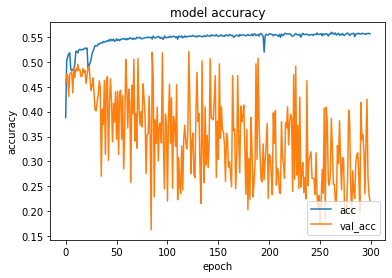

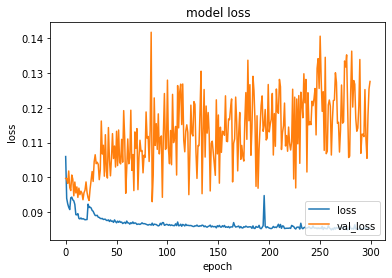

In [ ]:
# 学習履歴をプロット
plot_history(history)

**参考**


*   ［Python］CSVに保存したワイン1600本分のデータを使ってDeepLearingを実装
https://qiita.com/tanakadaichi_1989/items/c655d93a1fae56f2be07
*   リスト項目

